In [13]:
import pickle
import gzip
import json
#from modules.YieldTools import YieldTools
def get_hist_from_pkl(path_to_pkl,allow_empty=True):
        h = pickle.load( gzip.open(path_to_pkl) )
        if not allow_empty:
            h = {k:v for k,v in h.items() if v.values() != {}}
        return h

In [14]:
#yt = YieldTools()

In [15]:
import hist
import matplotlib.pyplot as plt

def dictplot(histodict,name='plot'):
    
    for histo in histodict:
        fig, ax = plt.subplots(figsize=(6, 4))
        for k in histo.keys():
            dicty=histo[k]
            (dicty['file'][k].to_hist().project(dicty['axis'])).plot(ax=ax, lw=3,label=dicty['label'])
        ax.legend()
        #plt.savefig(f"{name}_ratio.pdf", dpi=150)
        
        
def dictplotratio(histodict,name='plot'):
    
    for histo in histodict:
        fig, ax = plt.subplots(figsize=(6, 4))
        for k in histo.keys():
            dicty1=histo[k][0]
            dicty2=histo[k][1]
            h1=(dicty1['file'][dicty1['label']].to_hist().project(dicty1['axis']))
            h2=(dicty2['file'][dicty2['label']].to_hist().project(dicty2['axis']))
            (h2/h1).plot(ax=ax, lw=3,label=dicty1['label'])
        ax.legend()
        #plt.savefig(f"{name}_ratio.pdf", dpi=150)

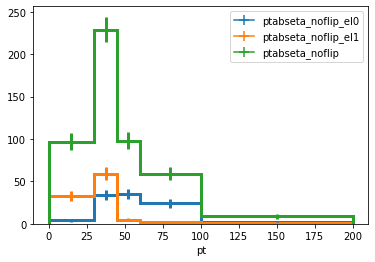

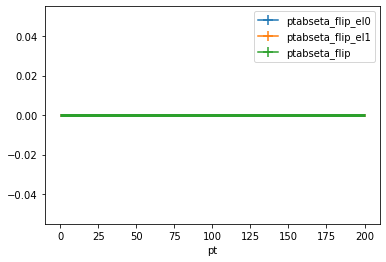

In [16]:
hin_dict = get_hist_from_pkl('Analysis/chflip/output/results.pkl.gz')

histodict=[
    {
        'ptabseta_noflip_el0':{'label':'ptabseta_noflip_el0','axis':'pt','file':hin_dict},
        'ptabseta_noflip_el1':{'label':'ptabseta_noflip_el1','axis':'pt','file':hin_dict},
        'ptabseta_noflip':{'label':'ptabseta_noflip','axis':'pt','file':hin_dict},
    },
    {
        'ptabseta_flip_el0':{'label':'ptabseta_flip_el0','axis':'pt','file':hin_dict},
        'ptabseta_flip_el1':{'label':'ptabseta_flip_el1','axis':'pt','file':hin_dict},
        'ptabseta_flip':{'label':'ptabseta_flip','axis':'pt','file':hin_dict},
    },
]

dictplot(histodict)

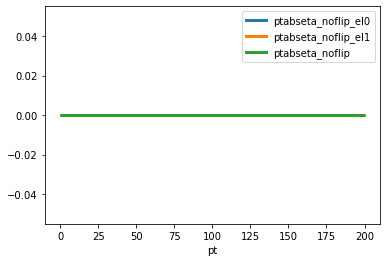

In [17]:
histodict=[
    {
        'ptabseta_noflip_el0':[{'label':'ptabseta_noflip_el0','axis':'pt','file':hin_dict},{'label':'ptabseta_flip_el0','axis':'pt','file':hin_dict}],
        'ptabseta_noflip_el1':[{'label':'ptabseta_noflip_el1','axis':'pt','file':hin_dict},{'label':'ptabseta_flip_el0','axis':'pt','file':hin_dict}],
        'ptabseta_noflip':[{'label':'ptabseta_noflip','axis':'pt','file':hin_dict},{'label':'ptabseta_flip','axis':'pt','file':hin_dict}]
    },
]

dictplotratio(histodict)

In [18]:
hin_dict

{'ptabseta_noflip': <Hist (sam,pt,abseta) instance at 0x7f6280049400>,
 'ptabseta_flip': <Hist (sam,pt,abseta) instance at 0x7f61ebc067f0>,
 'ptabseta_noflip_el0': <Hist (sam,pt,abseta) instance at 0x7f61df2890d0>,
 'ptabseta_flip_el0': <Hist (sam,pt,abseta) instance at 0x7f61df289490>,
 'ptabseta_noflip_el1': <Hist (sam,pt,abseta) instance at 0x7f61df289850>,
 'ptabseta_flip_el1': <Hist (sam,pt,abseta) instance at 0x7f61df289c10>,
 'cutflow': <Hist (selection,x) instance at 0x7f61df289fd0>}

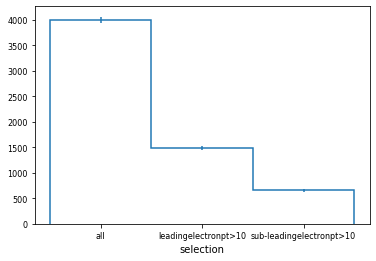

In [33]:
fig, ax = plt.subplots(figsize=(6, 4))
hin_dict['cutflow'].to_hist().project('selection').plot(ax=ax)
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=8)
#ax.set_xlim(1,4)
#plt.xticks(rotation=90)